In [ ]:
!pip install pandas==2.1.2
!pip install datasets==2.14.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━

In [ ]:
!pip install torchinfo

In [ ]:
!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datasets import load_dataset
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

from torchinfo import summary
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import json

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.callbacks import History

In [2]:
# Load the datasets
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

# Display the first few rows of each dataset and their info
train_data.head()
test_data.head()


train_data.info()

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [ ]:
print("Train dataset size:", train_data.shape[0])


Train dataset size: 27481


In [ ]:
print("Test dataset size:", test_data.shape[0])


Test dataset size: 3534


In [ ]:
print("Type of train dataset:", type(train_data))


Type of train dataset: <class 'pandas.core.frame.DataFrame'>


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
train_data.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


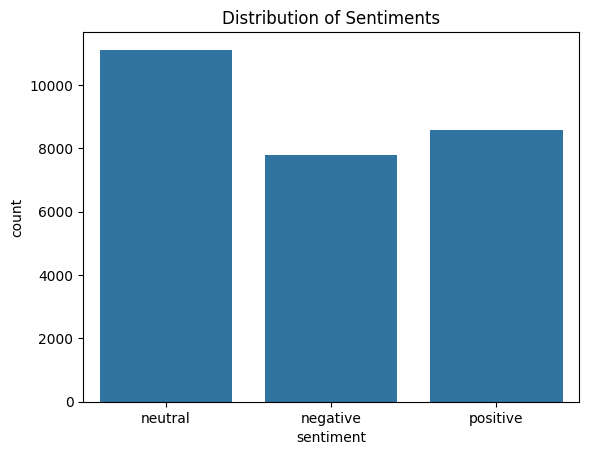

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

print(train_data.isnull().sum())

# Distribution of sentiments
sns.countplot(x='sentiment', data=train_data)
plt.title('Distribution of Sentiments')
plt.show()


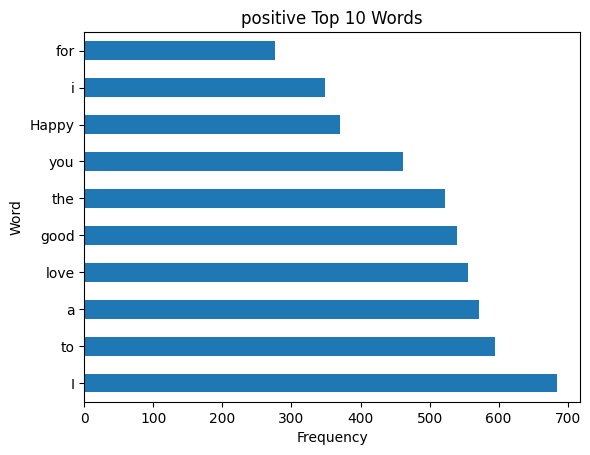

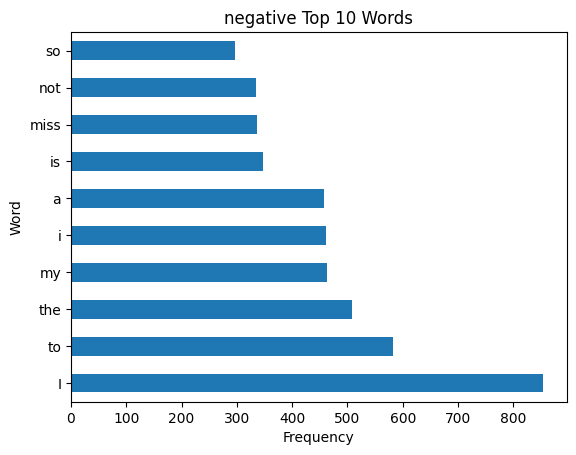

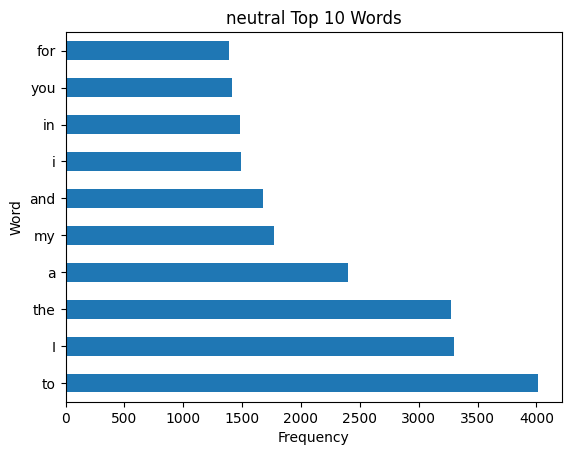

In [ ]:
def plot_top_words(sentiment, n=10):
    text = ' '.join(df_train[df_train['sentiment'] == sentiment]['selected_text'].astype(str))
    words = pd.Series(text.split())
    top_words = words.value_counts().head(n)
    top_words.plot(kind='barh')
    plt.title(sentiment + ' Top ' + str(n) + ' Words')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

for sentiment in sentiments:
    plot_top_words(sentiment)


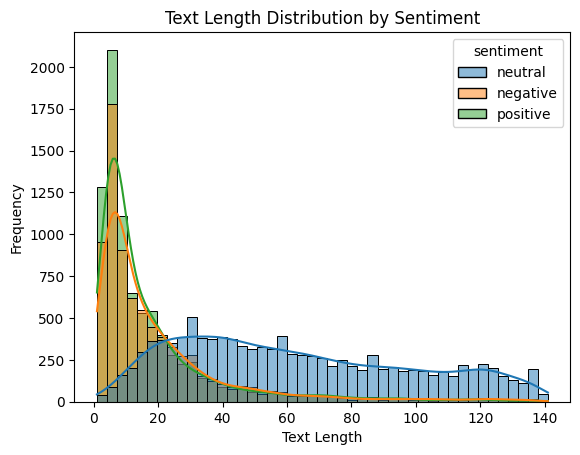

In [ ]:
# Text Length Analysis
train_data['text_length'] = train_data['selected_text'].apply(len)
sns.histplot(data=train_data, x='text_length', hue='sentiment', kde=True)
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


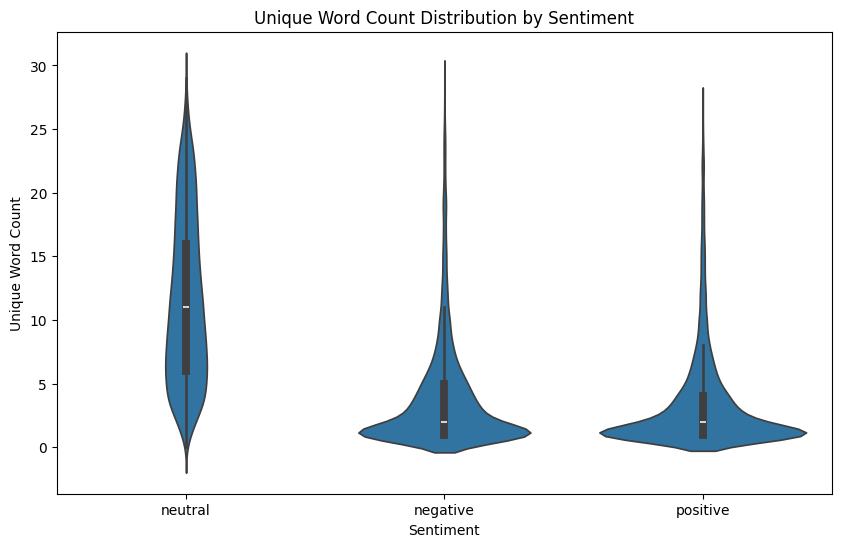

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get unique word count for each sentiment
def unique_word_count(text):
    if pd.isnull(text):  # Check if text is NaN
        return 0
    else:
        words = text.split()
        return len(set(words))

# Add a column for unique word count
train_data['unique_word_count'] = train_data['selected_text'].apply(unique_word_count)

# Violin plot for unique word count distribution by sentiment
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='unique_word_count', data=train_data)
plt.title('Unique Word Count Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Unique Word Count')
plt.show()


In [ ]:

a = train_data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
a.style.background_gradient(cmap='Blues')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


In [4]:
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
# Preprocessing function
def preprocess_data(data):
    tokenizer = RegexpTokenizer(r"\w+")
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Fill NaN values with an empty string to avoid AttributeError
    data['text'] = data['text'].fillna('')

    # Lowercase, tokenize, remove stopwords, and lemmatize
    data['processed_text'] = data['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in tokenizer.tokenize(x.lower()) if word not in stop_words]))
    return data

# Apply preprocessing
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Data Preprocessing

In [5]:
# Vectorization
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(train_data['processed_text'])
y_train = train_data['sentiment']

In [6]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

## Naive Bayes Model Training & Cross-validation

In [7]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train_encoded)
nb_predictions = nb_classifier.predict(X_train)
nb_cv_scores = cross_val_score(nb_classifier, X_train, y_train_encoded, cv=5)
print("Naive Bayes CV Scores:", nb_cv_scores)


Naive Bayes CV Scores: [0.6583591  0.65775109 0.6621179  0.66229985 0.66048035]


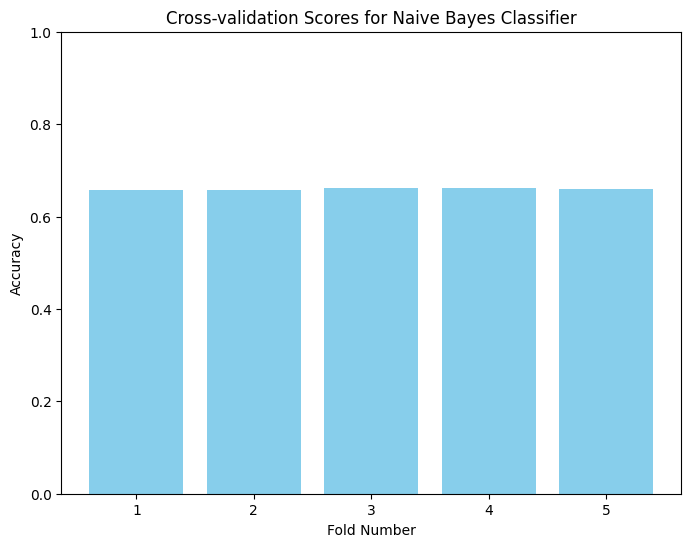

In [8]:
import matplotlib.pyplot as plt

# Plotting the Naive Bayes cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), nb_cv_scores, color='skyblue')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores for Naive Bayes Classifier')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(range(1, 6))
plt.show()


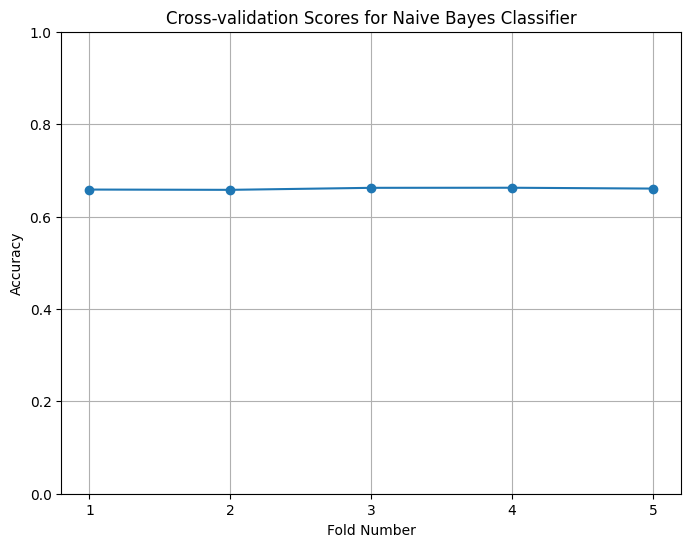

In [9]:
# Plotting the line graph of Naive Bayes cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), nb_cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores for Naive Bayes Classifier')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()


In [10]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train_encoded)
nb_predictions = nb_classifier.predict(X_train)
nb_cv_scores = cross_val_score(nb_classifier, X_train, y_train_encoded, cv=10)
print("Naive Bayes CV Scores:", nb_cv_scores)


Naive Bayes CV Scores: [0.66678792 0.65611354 0.66375546 0.64919942 0.66120815 0.67612809
 0.65320233 0.66666667 0.66339156 0.66411936]


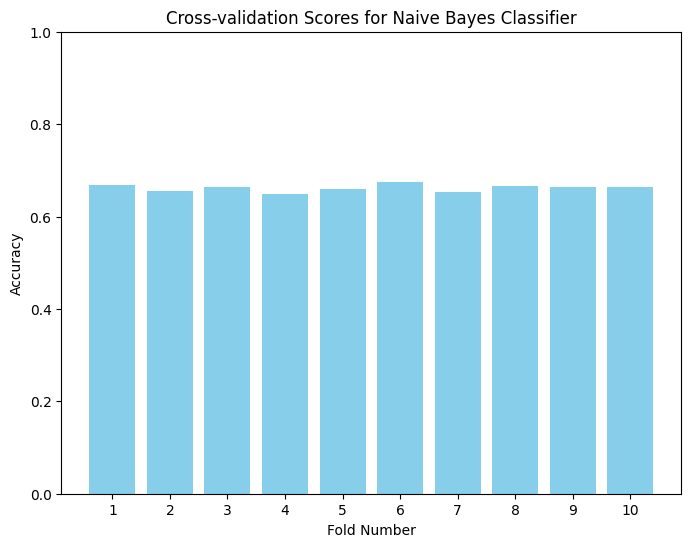

In [ ]:
import matplotlib.pyplot as plt

# Plotting the Naive Bayes cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), nb_cv_scores, color='skyblue')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores for Naive Bayes Classifier')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(range(1, 11))
plt.show()


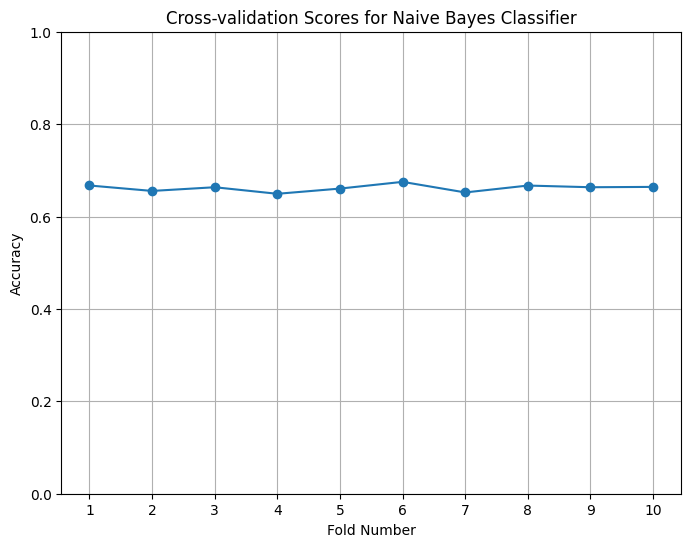

In [ ]:
# Plotting the line graph of Naive Bayes cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), nb_cv_scores, marker='o', linestyle='-')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores for Naive Bayes Classifier')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [11]:
from sklearn.metrics import classification_report

# Print Classification Report
print("Classification Report for Naive Bayes Classifier:")
print(classification_report(y_train_encoded, nb_predictions, target_names=label_encoder.classes_))


Classification Report for Naive Bayes Classifier:
              precision    recall  f1-score   support

    negative       0.73      0.60      0.66      7781
     neutral       0.63      0.76      0.69     11118
    positive       0.76      0.69      0.72      8582

    accuracy                           0.69     27481
   macro avg       0.71      0.68      0.69     27481
weighted avg       0.70      0.69      0.69     27481



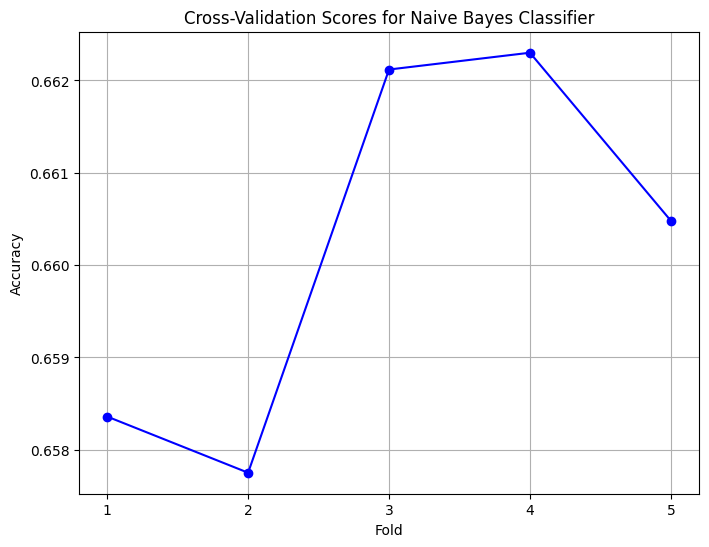

In [ ]:
import matplotlib.pyplot as plt

# Plot Cross-Validation Scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), nb_cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores for Naive Bayes Classifier')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()


In [12]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split


In [13]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['processed_text'])

# Convert text data to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(train_data['processed_text'])
X_test_seq = tokenizer.texts_to_sequences(test_data['processed_text'])

In [14]:
# Padding sequences
max_length = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')


In [15]:
from keras.utils import to_categorical

# Convert sentiment labels to categorical values
sentiment_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
train_data['sentiment_encoded'] = train_data['sentiment'].map(sentiment_mapping)
y_train = to_categorical(train_data['sentiment_encoded'])


In [16]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)


In [17]:
# Build RNN model
rnn_model = Sequential([
    Embedding(len(tokenizer.word_index)+1, 100, input_length=max_length),
    LSTM(128),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_final, y_train_final, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
344/344 [==============================] - 38s 96ms/step - loss: 1.0743 - accuracy: 0.4168 - val_loss: 0.8908 - val_accuracy: 0.6202
Epoch 2/10
344/344 [==============================] - 6s 18ms/step - loss: 0.7604 - accuracy: 0.6784 - val_loss: 0.7233 - val_accuracy: 0.7073
Epoch 3/10
344/344 [==============================] - 5s 13ms/step - loss: 0.5525 - accuracy: 0.7921 - val_loss: 0.7287 - val_accuracy: 0.7026
Epoch 4/10
344/344 [==============================] - 3s 10ms/step - loss: 0.3949 - accuracy: 0.8618 - val_loss: 0.8622 - val_accuracy: 0.6718
Epoch 5/10
344/344 [==============================] - 3s 10ms/step - loss: 0.2974 - accuracy: 0.8972 - val_loss: 0.9862 - val_accuracy: 0.6767
Epoch 6/10
344/344 [==============================] - 3s 9ms/step - loss: 0.2398 - accuracy: 0.9178 - val_loss: 0.9918 - val_accuracy: 0.6756
Epoch 7/10
344/344 [==============================] - 3s 8ms/step - loss: 0.1977 - accuracy: 0.9321 - val_loss: 1.1548 - val_accuracy: 0.6705


In [18]:
# Build Bi-LSTM model
bilstm_model = Sequential([
    Embedding(len(tokenizer.word_index)+1, 100, input_length=max_length),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
bilstm_model.fit(X_train_final, y_train_final, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
344/344 [==============================] - 18s 41ms/step - loss: 0.8427 - accuracy: 0.6123 - val_loss: 0.7085 - val_accuracy: 0.7080
Epoch 2/10
344/344 [==============================] - 5s 14ms/step - loss: 0.5887 - accuracy: 0.7688 - val_loss: 0.7160 - val_accuracy: 0.7164
Epoch 3/10
344/344 [==============================] - 4s 12ms/step - loss: 0.4209 - accuracy: 0.8412 - val_loss: 0.7969 - val_accuracy: 0.7024
Epoch 4/10
344/344 [==============================] - 3s 9ms/step - loss: 0.3189 - accuracy: 0.8865 - val_loss: 0.9025 - val_accuracy: 0.6838
Epoch 5/10
344/344 [==============================] - 4s 11ms/step - loss: 0.2469 - accuracy: 0.9158 - val_loss: 1.0891 - val_accuracy: 0.6669
Epoch 6/10
344/344 [==============================] - 3s 9ms/step - loss: 0.2006 - accuracy: 0.9322 - val_loss: 1.1199 - val_accuracy: 0.6640
Epoch 7/10
344/344 [==============================] - 3s 9ms/step - loss: 0.1636 - accuracy: 0.9456 - val_loss: 1.2730 - val_accuracy: 0.6678
E

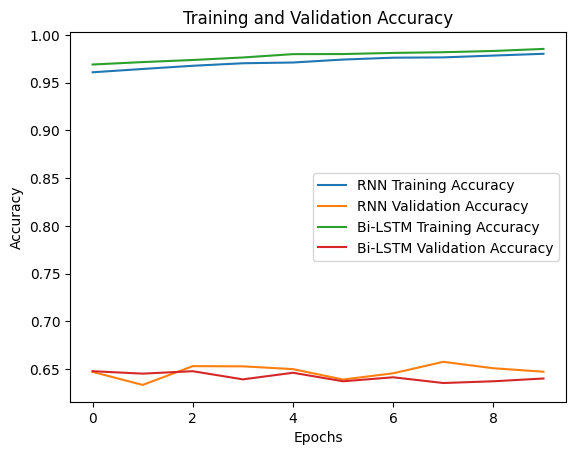

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Train the RNN model
rnn_history = rnn_model.fit(X_train_final, y_train_final, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=0)

# Train the Bi-LSTM model
bilstm_history = bilstm_model.fit(X_train_final, y_train_final, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=0)

# Plot accuracy curves
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(bilstm_history.history['accuracy'], label='Bi-LSTM Training Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='Bi-LSTM Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



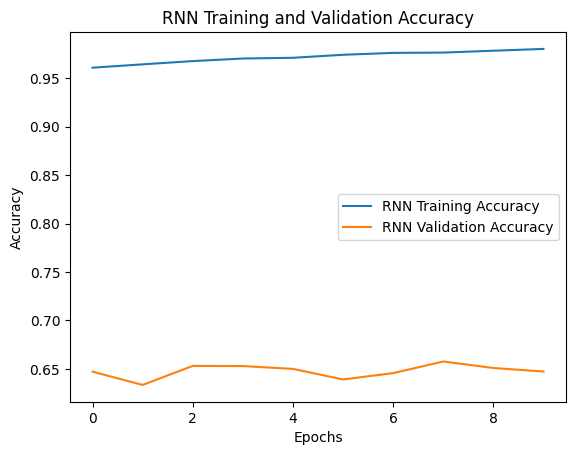

In [20]:
import matplotlib.pyplot as plt

# Plot RNN accuracy curves
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



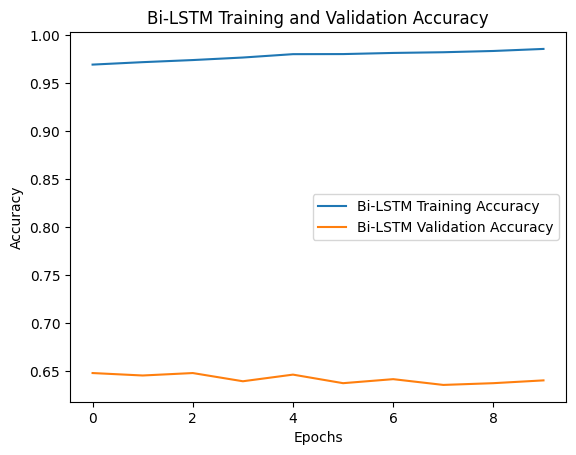

In [21]:
# Plot Bi-LSTM accuracy curves
plt.plot(bilstm_history.history['accuracy'], label='Bi-LSTM Training Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='Bi-LSTM Validation Accuracy')
plt.title('Bi-LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predictions on validation set for RNN model
rnn_preds = np.argmax(rnn_model.predict(X_val), axis=-1)

# Predictions on validation set for Bi-LSTM model
bilstm_preds = np.argmax(bilstm_model.predict(X_val), axis=-1)

# True labels
true_labels = np.argmax(y_val, axis=-1)

# Classification report for RNN model
print("Classification Report for RNN Model:")
print(classification_report(true_labels, rnn_preds))

# Classification report for Bi-LSTM model
print("\nClassification Report for Bi-LSTM Model:")
print(classification_report(true_labels, bilstm_preds))


172/172 [==============================] - 6s 33ms/step
Classification Report for RNN Model:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1705
           1       0.61      0.65      0.63      1562
           2       0.63      0.60      0.61      2230

    accuracy                           0.64      5497
   macro avg       0.64      0.65      0.65      5497
weighted avg       0.64      0.64      0.64      5497


Classification Report for Bi-LSTM Model:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1705
           1       0.60      0.65      0.62      1562
           2       0.62      0.58      0.60      2230

    accuracy                           0.63      5497
   macro avg       0.63      0.64      0.64      5497
weighted avg       0.63      0.63      0.63      5497



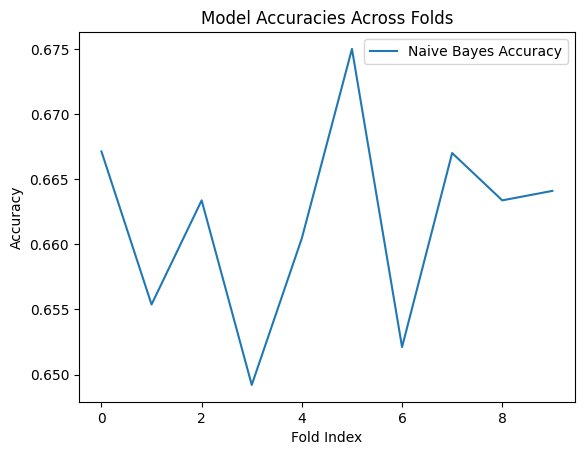

In [ ]:
# Plotting function for accuracies
def plot_model_accuracies(*args):
    for name, scores in args:
        plt.plot(scores, label=f'{name} Accuracy')
    plt.title('Model Accuracies Across Folds')
    plt.xlabel('Fold Index')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plotting the Naive Bayes accuracies
plot_model_accuracies(('Naive Bayes', nb_cv_scores))


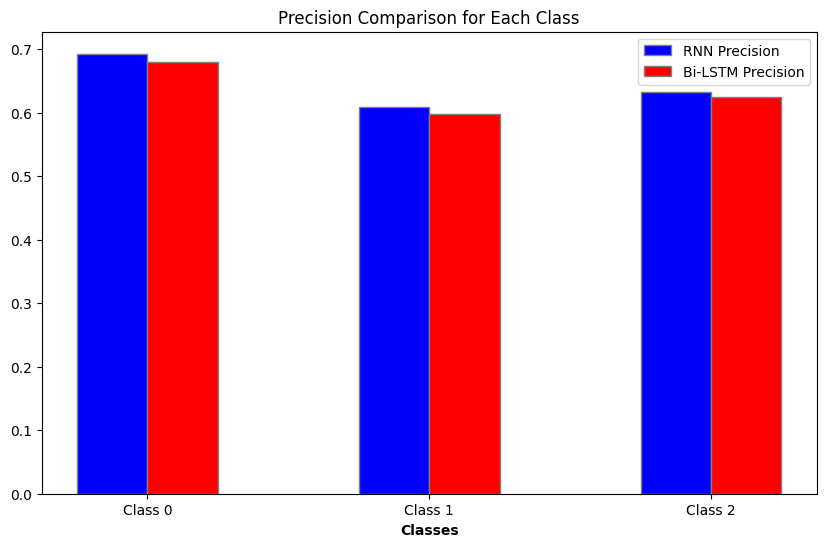

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Precision, recall, and F1-score values for RNN model
rnn_report = precision_recall_fscore_support(true_labels, rnn_preds, average=None)
rnn_precision, rnn_recall, rnn_f1_score, _ = rnn_report

# Precision, recall, and F1-score values for Bi-LSTM model
bilstm_report = precision_recall_fscore_support(true_labels, bilstm_preds, average=None)
bilstm_precision, bilstm_recall, bilstm_f1_score, _ = bilstm_report

# Define classes
classes = ['Class 0', 'Class 1', 'Class 2']

# Set width of bars
bar_width = 0.25

# Set position of bar on X axis
r1 = range(len(classes))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, rnn_precision, color='b', width=bar_width, edgecolor='grey', label='RNN Precision')
plt.bar(r2, bilstm_precision, color='r', width=bar_width, edgecolor='grey', label='Bi-LSTM Precision')

# Add xticks on the middle of the group bars
plt.xlabel('Classes', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(classes))], classes)

# Create legend & Show graphic
plt.legend()
plt.title('Precision Comparison for Each Class')
plt.show()


In [24]:
# Predictions for RNN model
y_pred_rnn_prob = rnn_model.predict(X_val)
y_pred_rnn = np.argmax(y_pred_rnn_prob, axis=1)
# Convert one-hot encoded labels back to original labels
y_true_rnn = [np.argmax(label) for label in y_val]

# Predictions for Bi-LSTM model
y_pred_bilstm_prob = bilstm_model.predict(X_val)
y_pred_bilstm = np.argmax(y_pred_bilstm_prob, axis=1)
# Convert one-hot encoded labels back to original labels
y_true_bilstm = [np.argmax(label) for label in y_val]

# Print confusion matrix for RNN model
print("Confusion Matrix for RNN Model:")
print(confusion_matrix(y_true_rnn, y_pred_rnn))

# Print confusion matrix for Bi-LSTM model
print("\nConfusion Matrix for Bi-LSTM Model:")
print(confusion_matrix(y_true_bilstm, y_pred_bilstm))


172/172 [==============================] - 2s 4ms/step
Confusion Matrix for RNN Model:
[[1228   88  389]
 [ 147  842  573]
 [ 445  297 1488]]

Confusion Matrix for Bi-LSTM Model:
[[1099  106  500]
 [ 125  926  511]
 [ 345  391 1494]]


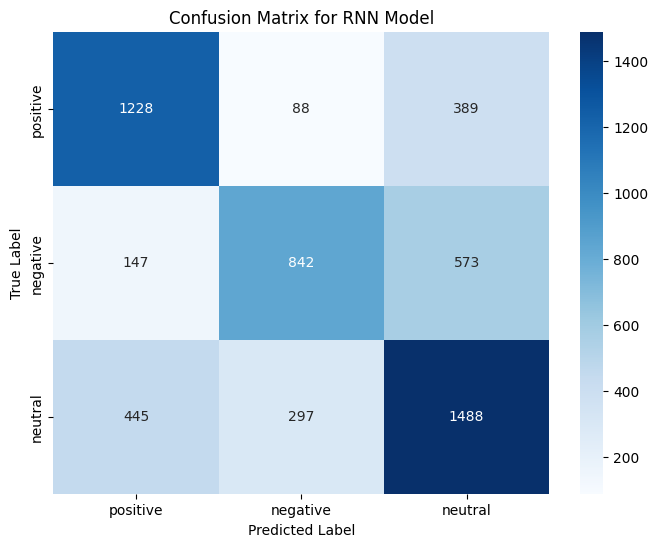

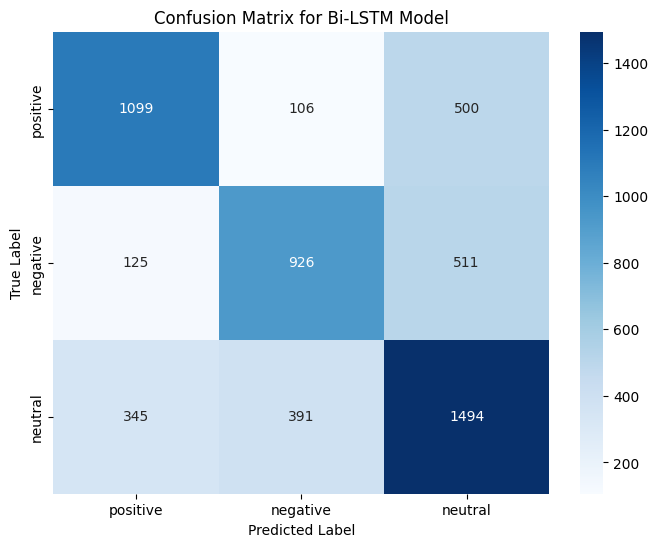

In [25]:
import seaborn as sns

# Plot confusion matrix for RNN model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true_rnn, y_pred_rnn), annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.title('Confusion Matrix for RNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for Bi-LSTM model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true_bilstm, y_pred_bilstm), annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.title('Confusion Matrix for Bi-LSTM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
